In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

finnhub_api_key = 'cpg1ma1r01ql1vn3fk4gcpg1ma1r01ql1vn3fk50'
url=f'https://finnhub.io/api/v1/news?category=general&token={finnhub_api_key}'

response=requests.get(url)
data=response.json()

if response.status_code==200:
    with open (r'C:\Users\Hi\Finlang\src\data\raw\newsapi\extracted_json_data.json' ,'w') as file:
        json.dump(data,file,indent=4)
    print('Json data successfully extracted...!')
else:
    print(f'failed due to {response.status_code}')

with open(r'C:\Users\Hi\Finlang\src\data\raw\newsapi\extracted_json_data.json' ,'r') as file:
    news_data=json.load(file)
    data=pd.DataFrame(news_data)
    print(data.head(5))

data.to_csv(r'C:\Users\Hi\Finlang\src\data\raw\news_data.csv')
print(f'news_data saved into csv format..!')

Json data successfully extracted...!
   category    datetime                                           headline  \
0  top news  1745539260  Alphabet’s blowout earnings may mark the peak ...   
1  top news  1745538649  Alphabet expects 'slight headwind' to ads busi...   
2  top news  1745535772  Jim Cramer credits this week's rally to earnin...   
3  top news  1745535000  S&P 500’s rapid exit from correction territory...   
4  top news  1745530320  Democrats ask if the $1 billion in DOGE cost-c...   

        id                                              image related  \
0  7475478  https://static2.finnhub.io/file/publicdatany/f...           
1  7475476  https://image.cnbcfm.com/api/v1/image/10813640...           
2  7475477  https://image.cnbcfm.com/api/v1/image/10707631...           
3  7475462  https://static2.finnhub.io/file/publicdatany/f...           
4  7475437  https://static2.finnhub.io/file/publicdatany/f...           

        source                                         

In [3]:
# Load & Clean Data

In [4]:
import pandas as pd 

data=pd.read_csv(r'C:\Users\Hi\Finlang\src\data\raw\news_data.csv')
data.head(2)

,Unnamed: 0,category,datetime,headline,id,image,related,source,summary,url
0,0,top news,1745539260,Alphabet’s blowout earnings may mark the peak ...,7475478,https://static2.finnhub.io/file/publicdatany/f...,NaN,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...
1,1,top news,1745538649,Alphabet expects 'slight headwind' to ads busi...,7475476,https://image.cnbcfm.com/api/v1/image/10813640...,NaN,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...


In [5]:

data.info

<bound method DataFrame.info of     Unnamed: 0  category    datetime  \
0            0  top news  1745539260   
1            1  top news  1745538649   
2            2  top news  1745535772   
3            3  top news  1745535000   
4            4  top news  1745530320   
..         ...       ...         ...   
95          95  top news  1745405640   
96          96  top news  1745405625   
97          97  top news  1745404680   
98          98  top news  1745403780   
99          99  top news  1745399700   

                                             headline       id  \
0   Alphabet’s blowout earnings may mark the peak ...  7475478   
1   Alphabet expects 'slight headwind' to ads busi...  7475476   
2   Jim Cramer credits this week's rally to earnin...  7475477   
3   S&P 500’s rapid exit from correction territory...  7475462   
4   Democrats ask if the $1 billion in DOGE cost-c...  7475437   
..                                                ...      ...   
95  The buying opportunit

In [6]:
data.columns

Index(['Unnamed: 0', 'category', 'datetime', 'headline', 'id', 'image',
       'related', 'source', 'summary', 'url'],
      dtype='object')

In [7]:
data=data.set_index('id')


In [8]:
data.head(5)

,Unnamed: 0,category,datetime,headline,image,related,source,summary,url
id,,,,,,,,,
7475478,0,top news,1745539260,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,NaN,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...
7475476,1,top news,1745538649,Alphabet expects 'slight headwind' to ads busi...,https://image.cnbcfm.com/api/v1/image/10813640...,NaN,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...
7475477,2,top news,1745535772,Jim Cramer credits this week's rally to earnin...,https://image.cnbcfm.com/api/v1/image/10707631...,NaN,CNBC,CNBC's Jim Cramer analyzed recent market action.,https://www.cnbc.com/2025/04/24/jim-cramer-att...
7475462,3,top news,1745535000,S&P 500’s rapid exit from correction territory...,https://static2.finnhub.io/file/publicdatany/f...,NaN,MarketWatch,The stock market just recouped a stunning $4.2...,https://www.marketwatch.com/story/s-p-500s-rap...
7475437,4,top news,1745530320,Democrats ask if the $1 billion in DOGE cost-c...,https://static2.finnhub.io/file/publicdatany/f...,NaN,MarketWatch,Senators ask for the impact of staffing cuts a...,https://www.marketwatch.com/story/democrats-as...


In [9]:
data=data.rename(columns={'Unnamed: 0':'index'})
data.columns

Index(['index', 'category', 'datetime', 'headline', 'image', 'related',
       'source', 'summary', 'url'],
      dtype='object')

In [10]:
data=data.drop(columns=['related'])


In [11]:
data.info

<bound method DataFrame.info of          index  category    datetime  \
id                                     
7475478      0  top news  1745539260   
7475476      1  top news  1745538649   
7475477      2  top news  1745535772   
7475462      3  top news  1745535000   
7475437      4  top news  1745530320   
...        ...       ...         ...   
7474751     95  top news  1745405640   
7475196     96  top news  1745405625   
7474721     97  top news  1745404680   
7474722     98  top news  1745403780   
7474713     99  top news  1745399700   

                                                  headline  \
id                                                           
7475478  Alphabet’s blowout earnings may mark the peak ...   
7475476  Alphabet expects 'slight headwind' to ads busi...   
7475477  Jim Cramer credits this week's rally to earnin...   
7475462  S&P 500’s rapid exit from correction territory...   
7475437  Democrats ask if the $1 billion in DOGE cost-c...   
...          

In [12]:
data.head(2)

,index,category,datetime,headline,image,source,summary,url
id,,,,,,,,
7475478,0,top news,1745539260,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...
7475476,1,top news,1745538649,Alphabet expects 'slight headwind' to ads busi...,https://image.cnbcfm.com/api/v1/image/10813640...,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...


In [13]:
data.head(2)

,index,category,datetime,headline,image,source,summary,url
id,,,,,,,,
7475478,0,top news,1745539260,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...
7475476,1,top news,1745538649,Alphabet expects 'slight headwind' to ads busi...,https://image.cnbcfm.com/api/v1/image/10813640...,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...


In [14]:
data['datetime']=pd.to_datetime(data['datetime'],unit='s')
data['datetime']

id
7475478   2025-04-25 00:01:00
7475476   2025-04-24 23:50:49
7475477   2025-04-24 23:02:52
7475462   2025-04-24 22:50:00
7475437   2025-04-24 21:32:00
                  ...        
7474751   2025-04-23 10:54:00
7475196   2025-04-23 10:53:45
7474721   2025-04-23 10:38:00
7474722   2025-04-23 10:23:00
7474713   2025-04-23 09:15:00
Name: datetime, Length: 100, dtype: datetime64[ns]

In [15]:
data['datetime'].head(10)

id
7475478   2025-04-25 00:01:00
7475476   2025-04-24 23:50:49
7475477   2025-04-24 23:02:52
7475462   2025-04-24 22:50:00
7475437   2025-04-24 21:32:00
7475438   2025-04-24 21:30:00
7475423   2025-04-24 20:43:00
7475420   2025-04-24 20:14:00
7475406   2025-04-24 20:07:00
7475404   2025-04-24 19:47:00
Name: datetime, dtype: datetime64[ns]

In [16]:
data['date']=data['datetime'].dt.date
data['date']

id
7475478    2025-04-25
7475476    2025-04-24
7475477    2025-04-24
7475462    2025-04-24
7475437    2025-04-24
              ...    
7474751    2025-04-23
7475196    2025-04-23
7474721    2025-04-23
7474722    2025-04-23
7474713    2025-04-23
Name: date, Length: 100, dtype: object

In [17]:
data.head(2)

,index,category,datetime,headline,image,source,summary,url,date
id,,,,,,,,,
7475478,0,top news,2025-04-25 00:01:00,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...,2025-04-25
7475476,1,top news,2025-04-24 23:50:49,Alphabet expects 'slight headwind' to ads busi...,https://image.cnbcfm.com/api/v1/image/10813640...,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...,2025-04-24


In [18]:
data.to_csv(r'C:\Users\Hi\Finlang\data\api\processed_data.csv')

In [19]:
news_count=data.groupby('date').size()

In [20]:
news_count

date
2025-04-23    50
2025-04-24    49
2025-04-25     1
dtype: int64

<Axes: xlabel='date'>

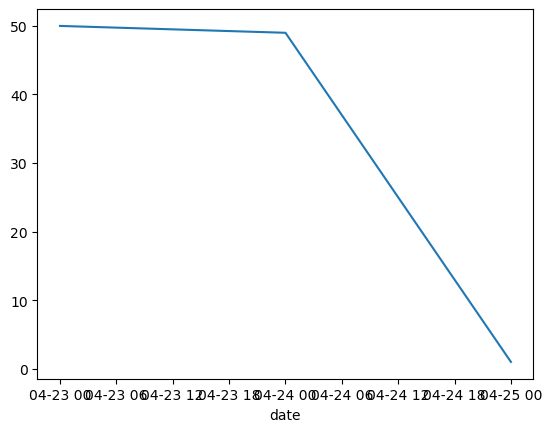

In [21]:
news_count.plot()

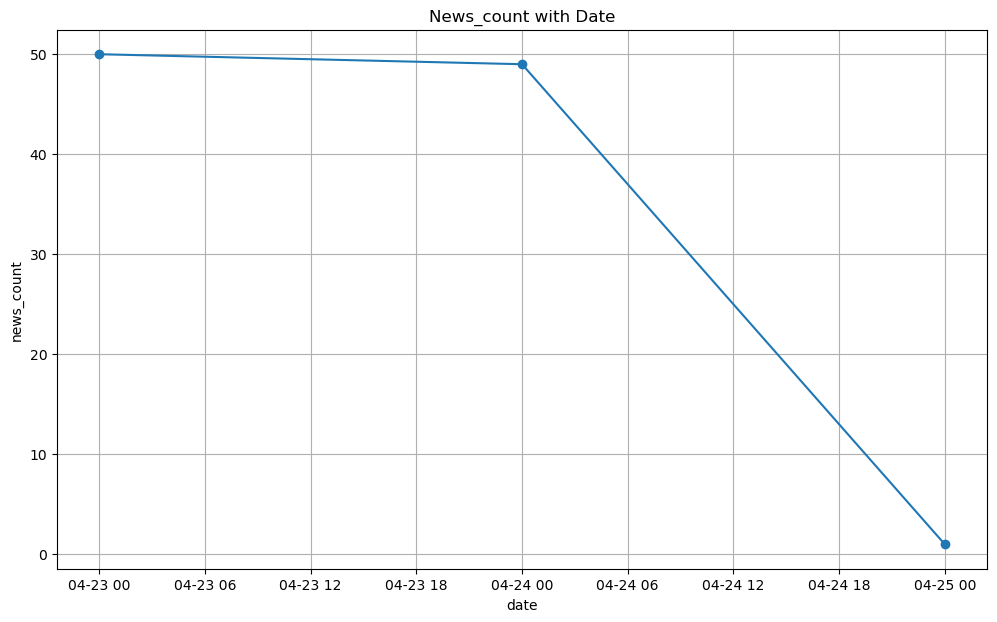

In [22]:
plt.figure(figsize=(12,7))
news_count.plot(kind='line' ,marker='o',)
plt.xlabel('date')
plt.ylabel('news_count')
plt.title('News_count with Date')
plt.grid()
plt.show()

In [23]:
data.dtypes

index                int64
category            object
datetime    datetime64[ns]
headline            object
image               object
source              object
summary             object
url                 object
date                object
dtype: object